# November ??th, 2021 (register N162)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(256, 0, 100), full_load=True, load_parcel=True, load_allen=True)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
# mice.parcel.fit_parcel(True)

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

num regions,    left: 768,  right: 768
region id diff,         r - l:  Counter({768: 768})

[PROGRESS] fit columnar: done

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] save results: done.

In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'ElasticSyN', 'SyNAggro'],
    'grads': [0.15, 0.20, 0.25, 0.3, 0.32, 0.34, 0.35, 0.37, 0.38, 0.39, 0.40, 0.5, 0.9],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN', 'SyNAggro'],
    'grads': [
        0.15,
        0.2,
        0.25,
        0.3,
        0.32,
        0.34,
        0.35,
        0.37,
        0.38,
        0.39,
        0.4,
        0.5,
        0.9
    ],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [5]:
reg.set_mode('bold')
reg.mi_base = None

In [6]:
key = 'sub-SLC08_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)

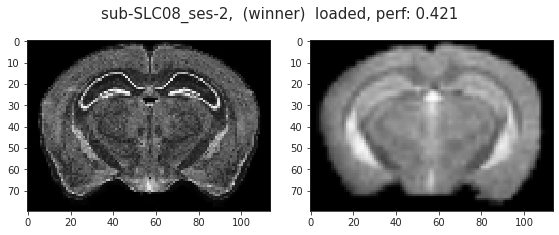

In [ ]:
results = reg.fit_register(
    name=key,
    moving=indiv,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [ ]:
save_obj(results['df'], f"fit_{key}_{now()}", tmp_dir, 'df')

In [ ]:
params = {
    'seed': 0,
    'type': 'SyN',
    'grad': 0.34,
    'syn_bin': 32,
    'aff_bin': 13,
    'aff_rate': 0.2,
}
cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df = results['df'].copy()
df_sub_main = df.loc[cond]
df_sub_main

In [ ]:
results['perf']

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
3888,0,SyN,0.34,32,13,0.2,mi,0.513319
3889,0,SyN,0.34,32,13,0.2,ovp_MOp,0.991127
3890,0,SyN,0.34,32,13,0.2,sym_MOp,0.949827
3891,0,SyN,0.34,32,13,0.2,ovp_MOs,0.995575
3892,0,SyN,0.34,32,13,0.2,sym_MOs,0.975524
3893,0,SyN,0.34,32,13,0.2,ovp_SS,0.998552
3894,0,SyN,0.34,32,13,0.2,sym_SS,0.960272
3895,0,SyN,0.34,32,13,0.2,ovp_VISC,1.000000
3896,0,SyN,0.34,32,13,0.2,sym_VISC,0.974359
3897,0,SyN,0.34,32,13,0.2,ovp_VIS,0.998298


0.9332882920401651

In [49]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
48193,2,ElasticSyN,0.2,64,13,0.8,sym,0.948029


In [50]:
params = dict(_df.iloc[_df['score'].argmax()])
params.pop('metric')
params.pop('score')

cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df_sub = df.loc[cond]
df_sub

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
48168,2,ElasticSyN,0.2,64,13,0.8,mi,0.504729
48169,2,ElasticSyN,0.2,64,13,0.8,ovp_MOp,0.998219
48170,2,ElasticSyN,0.2,64,13,0.8,sym_MOp,0.956446
48171,2,ElasticSyN,0.2,64,13,0.8,ovp_MOs,0.998294
48172,2,ElasticSyN,0.2,64,13,0.8,sym_MOs,0.979730
48173,2,ElasticSyN,0.2,64,13,0.8,ovp_SS,0.998292
48174,2,ElasticSyN,0.2,64,13,0.8,sym_SS,0.973034
48175,2,ElasticSyN,0.2,64,13,0.8,ovp_VISC,1.000000
48176,2,ElasticSyN,0.2,64,13,0.8,sym_VISC,0.957265
48177,2,ElasticSyN,0.2,64,13,0.8,ovp_VIS,0.994318


[<matplotlib.lines.Line2D object at 0x7fa770511f40>]

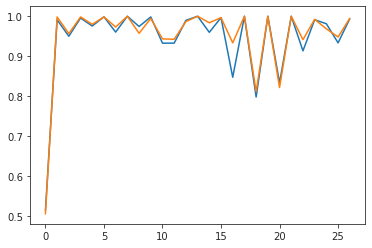

In [55]:
plt.plot(df_sub_main['score'].values)
plt.plot(df_sub['score'].values)

<AxesSubplot:xlabel='score', ylabel='Count'>

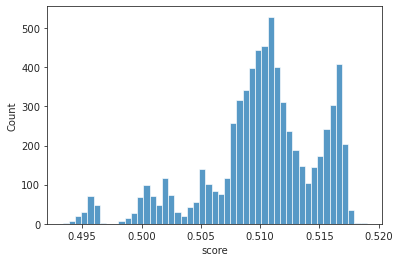

In [59]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

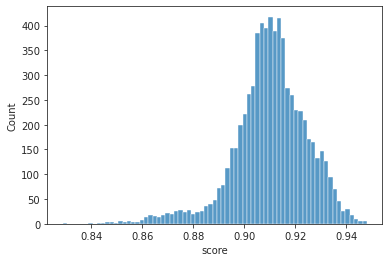

In [60]:
sns.histplot(df.loc[df['metric'] == 'sym', 'score'])

<AxesSubplot:>

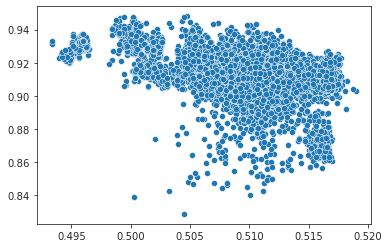

In [61]:
sns.scatterplot(
    x=df.loc[df['metric'] == 'mi', 'score'].values,
    y=df.loc[df['metric'] == 'sym', 'score'].values,
)

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)